#  <font color= 'red' font size = '40px'> Face Detection </font>

<img src='f1.jpg'>
<img src='f2.jpg'>

<h1>.....................................................................................................................</h1>

# <font color='blue'>Our team members</font>
### Md Golam Rabbani
**ID : 181-15-1808**
<br>

### Sharmila Zamman
**ID : 181-15-1796**
<br>

### Reaz Uddin Hemel
**ID : 181-15-1739**

# .............................................................................................................................
# <font color='blue'>Image properties</font>
#### Wrinkles:
Class 0: does_not_have<br>
Class 1: has<br>
#### Freakles
Class 0: does_not_have<br>
Class 1: has
#### Glasses:
Class 0: does_not_wear<br>
Class 1: wear_ normal<br>
Class 2: wear_sunglasses
#### Hair_color
Class 0: brown<br>
Class 1: black<br>
Class 2: gray<br>
Class 3: blond<br>
Class 4: red<br>
Class 5: white<br>
Class 6: mixed<br>
Class 7: other<br>
Class 8: not_visible
#### Hair_top
Class 0: bald or shaved<br>
Class 1: has_few_hair<br>
Class 2: has_thick_hair<br>
Class 3: not_visible
# .....................................................................................................................................

In [37]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1.5px  red solid !important;
  color: black !important;
}

# Import Modules

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from imutils import paths

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head(10)

,Image_name,wrinkles,freakles,glasses,hair color,hair top
0,emotionet_5_second_50000_50043,0,0,0,1,2
1,emotionet_5_second_50000_50044,1,0,0,0,2
2,emotionet_5_second_50000_50112,0,0,0,8,0
3,emotionet_5_second_50000_50152,0,0,0,1,1
4,emotionet_5_second_50000_50183,0,1,1,5,1
5,emotionet_5_second_50000_50184,0,0,0,6,2
6,emotionet_5_second_50000_50205,1,0,0,8,4
7,emotionet_5_second_50000_50245,0,0,0,1,2
8,emotionet_5_second_50000_50277,0,0,0,8,4
9,emotionet_5_second_50000_50321,0,0,0,0,2


In [6]:
df.shape

(1999, 6)

In [7]:
df.describe()

,wrinkles,freakles,glasses,hair color,hair top
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.044022,0.034517,0.103552,3.021011,1.992496
std,0.205195,0.182599,0.346269,2.679130,0.807524
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,0.000000,5.000000,2.000000
max,1.000000,1.000000,2.000000,8.000000,4.000000


<h2>For wrinkles</h2>

In [11]:
df['wrinkles'].value_counts()/df.shape[0]*100

0    95.597799
1     4.402201
Name: wrinkles, dtype: float64

In [12]:
df['wrinkles'].value_counts()

0    1911
1      88
Name: wrinkles, dtype: int64

In [13]:
def bar_chart(feature):
  has_wrinkles = df[df['wrinkles']==1][feature].value_counts()
  no_wrinkles = df[df['wrinkles']==0][feature].value_counts()
  df_new = pd.DataFrame([has_wrinkles,no_wrinkles])
  df_new.index = ['has_wrinkles','no_wrinkles']        # Labeling Legend
  df_new.plot(kind='bar', stacked=False, figsize=(10,5))

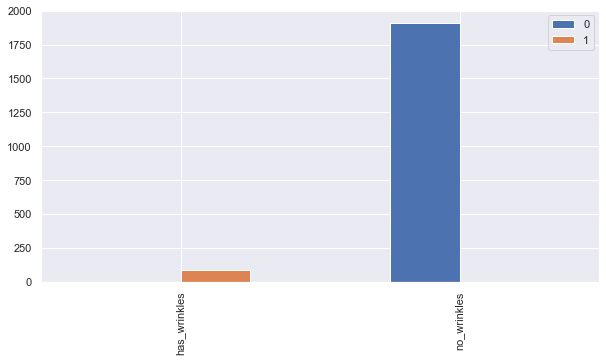

In [14]:
bar_chart('wrinkles')

<h2>For freakles</h2>

In [15]:
df['freakles'].value_counts()/df.shape[0]*100

0    96.548274
1     3.451726
Name: freakles, dtype: float64

In [16]:
df['freakles'].value_counts()

0    1930
1      69
Name: freakles, dtype: int64

In [17]:
def bar_chart(feature):
  has_freakles = df[df['freakles']==1][feature].value_counts()
  no_freakles = df[df['freakles']==0][feature].value_counts()
  df_new = pd.DataFrame([has_freakles,no_freakles])
  df_new.index = ['has_freakles','no_freakles']       
  df_new.plot(kind='bar', stacked=True, figsize=(10,5))

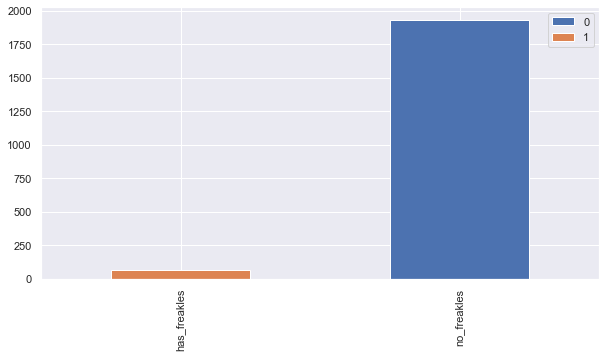

In [18]:
bar_chart('freakles')

<h2>For glasses</h2>

In [19]:
df['glasses'].value_counts()/df.shape[0]*100

0    90.995498
1     7.653827
2     1.350675
Name: glasses, dtype: float64

In [20]:
df['glasses'].value_counts()

0    1819
1     153
2      27
Name: glasses, dtype: int64

In [21]:
def bar_chart(feature):
  does_not_wear = df[df['glasses']==0][feature].value_counts()
  wear_normal = df[df['glasses']==1][feature].value_counts()
  wear_sunglasses = df[df['glasses']==2][feature].value_counts()
    
  df_new = pd.DataFrame([does_not_wear,wear_normal, wear_sunglasses])
  df_new.index = ['does_not_wear','wear_normal', 'wear_sunglasses']       
  df_new.plot(kind='bar', stacked=True, figsize=(10,5))

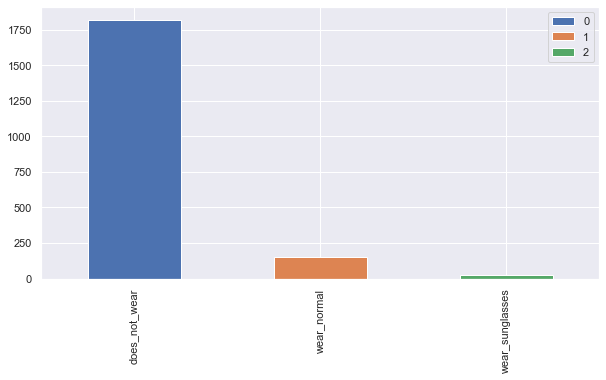

In [22]:
bar_chart('glasses')

<h2>For hair color</h2>

In [23]:
df['hair color'].value_counts()/df.shape[0]*100

1    47.823912
3    16.558279
8    13.656828
5     5.702851
6     5.002501
0     4.952476
7     4.402201
4     1.100550
2     0.800400
Name: hair color, dtype: float64

In [24]:
df['hair color'].value_counts()

1    956
3    331
8    273
5    114
6    100
0     99
7     88
4     22
2     16
Name: hair color, dtype: int64

In [25]:
def bar_chart(feature):
  brown = df[df['hair color']==0][feature].value_counts()
  black = df[df['hair color']==1][feature].value_counts()
  gray = df[df['hair color']==2][feature].value_counts()
  blond = df[df['hair color']==3][feature].value_counts()
  red = df[df['hair color']==4][feature].value_counts()
  white = df[df['hair color']==5][feature].value_counts()
  mixed = df[df['hair color']==6][feature].value_counts()
  other = df[df['hair color']==7][feature].value_counts()
  not_visible = df[df['hair color']==8][feature].value_counts()
    
  df_new = pd.DataFrame([brown, black, gray, blond, red, white, mixed, other, not_visible])
  df_new.index = ['brown', 'black', 'gray', 'blond', 'red', 'white', 'mixed', 'other', 'not_visible']        # Labeling Legend
  df_new.plot(kind='bar', stacked=True, figsize=(10,5))

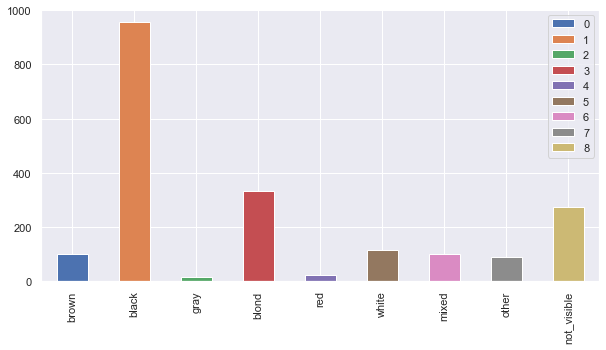

In [26]:
bar_chart('hair color')

<h2>For hair top</h2>

In [27]:
df['hair top'].value_counts()/df.shape[0]*100

2    71.135568
1    14.957479
4     9.154577
0     2.951476
3     1.800900
Name: hair top, dtype: float64

In [28]:
df['hair top'].value_counts()

2    1422
1     299
4     183
0      59
3      36
Name: hair top, dtype: int64

In [29]:
def bar_chart(feature):
  bald_or_shave = df[df['hair top']==0][feature].value_counts()
  has_few_hair = df[df['hair top']==1][feature].value_counts()
  has_thick_hair = df[df['hair top']==2][feature].value_counts()
  not_visible = df[df['hair top']==3][feature].value_counts()
  
  
  df_new = pd.DataFrame([bald_or_shave, has_few_hair, has_thick_hair, not_visible])
  df_new.index = ['bald_or_shave', 'has_few_hair', 'has_thick_hair', 'not_visible']        # Labeling Legend
  df_new.plot(kind='bar', stacked=True, figsize=(10,5))

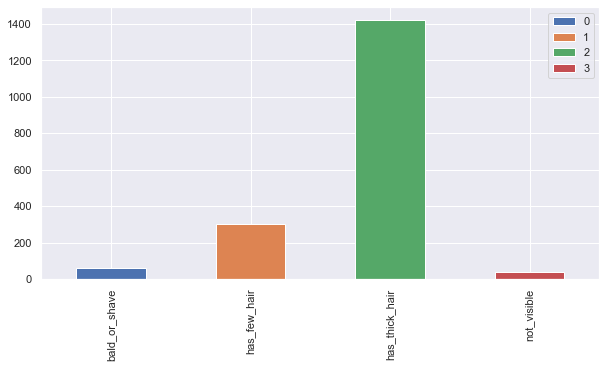

In [30]:
bar_chart('hair top')

# Augmentation

In [20]:
img_dir = list(paths.list_images(('second_50000')))

In [21]:
img_dir[:5]

['second_50000\\emotionet_5_second_50000_50043.jpg',
 'second_50000\\emotionet_5_second_50000_50044.jpg',
 'second_50000\\emotionet_5_second_50000_50112.jpg',
 'second_50000\\emotionet_5_second_50000_50152.jpg',
 'second_50000\\emotionet_5_second_50000_50183.jpg']

In [63]:
image_count = len(img_dir)
image_count

second_50000\emotionet_5_second_50000_50112.jpg


1999

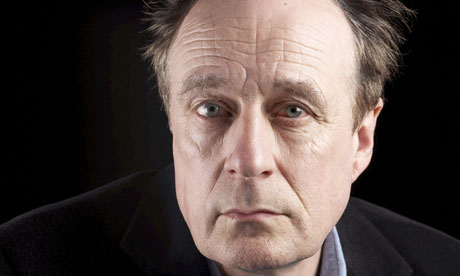

In [23]:
PIL.Image.open(str(img_dir[1]))

In [24]:
img = cv2.imread(str(img_dir[2]))
img.shape

(476, 344, 3)

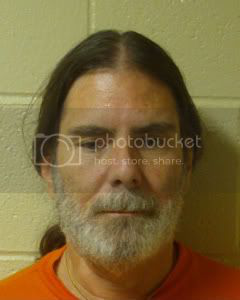

In [25]:
PIL.Image.open(str(img_dir[50]))

In [26]:
img = []
for i in range(image_count):
    img.append(cv2.imread(str(img_dir[i])))
    #print(img.shape)

### Resize images

In [27]:
for i in range(image_count):
    cv2.resize(cv2.imread(str(img_dir[i])), (180, 180)).shape

img = cv2.imread(str(img_dir[2]))
img.shape

In [28]:
df_new = df.drop('Image_name', axis = 1)
df_new.head()

,wrinkles,freakles,glasses,hair color,hair top
0,0,0,0,1,2
1,1,0,0,0,2
2,0,0,0,8,0
3,0,0,0,1,1
4,0,1,1,5,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, img, random_state = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


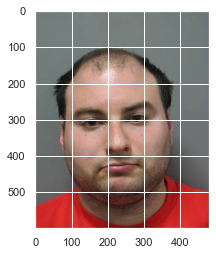

In [73]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    #vertical_flip=False,
    horizontal_flip=True,
    fill_mode='reflect'
)


x = img_to_array(load_img('second_50000\\emotionet_5_second_50000_50183.jpg'))
y = cv2.imread('second_50000\\emotionet_5_second_50000_50183.jpg')
plt.imshow(x/250)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


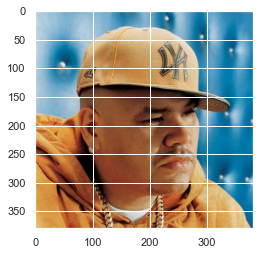

In [77]:
for i in img_dir:
    x = img_to_array(load_img(i))
    y = cv2.imread(i)
plt.imshow(x/250)
plt.show()

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [83]:
target = df['Image_name']

In [84]:
model.fit(df_new, target)

DecisionTreeClassifier()

In [85]:
img_name = model.predict([[0, 0, 0, 8, 0]])[0]
img_name

'emotionet_5_second_50000_50112'

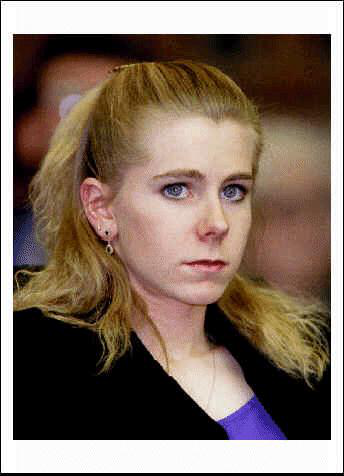

In [86]:
import re
k = 0
for name in img_dir:
       x = re.findall(img_name, name)
       if (x):
         break
       else:
         k+=1
PIL.Image.open(str(img_dir[k]))